In [75]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt

In [76]:
data = pd.read_csv("C:/Users/admin/Desktop/Homework/AI/AI_Class/Data/AAME.csv")
df = data[['Open', 'High', 'Low', 'Close']]
df

,Open,High,Low,Close
0,0.00,4.05,3.85,3.85
1,0.00,4.00,3.80,3.80
2,0.00,4.05,3.85,3.85
3,0.00,4.00,3.80,3.80
4,0.00,3.95,3.75,3.75
...,...,...,...,...
10093,2.29,2.29,2.08,2.28
10094,2.25,2.25,2.21,2.25
10095,2.25,2.25,2.13,2.13
10096,2.11,2.11,2.11,2.11


In [77]:
print(f"결측치 확인:\n{df.isnull().sum()}")
df.dropna(inplace=True)

결측치 확인:
Open     0
High     0
Low      0
Close    0
dtype: int64


C:\Users\admin\AppData\Local\Temp\ipykernel_24184\3153017363.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [78]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

def create_sequences(data, look_back, target_column_index):
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), :])
        Y.append(data[i + look_back, target_column_index])
    return np.array(X), np.array(Y)

window = 100

close_column_index = df.columns.get_loc('Close')

X, y = create_sequences(scaled_data, window, close_column_index)

print(f"\nX의 형태: {X.shape} (샘플 수, window, 피처 수)")
print(f"y의 형태: {y.shape} (샘플 수, 예측 목표)")


X의 형태: (9998, 100, 4) (샘플 수, window, 피처 수)
y의 형태: (9998,) (샘플 수, 예측 목표)


In [79]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(y)]

print(f"\n학습 데이터 X_train 형태: {X_train.shape}")
print(f"학습 데이터 y_train 형태: {y_train.shape}")
print(f"테스트 데이터 X_test 형태: {X_test.shape}")
print(f"테스트 데이터 y_test 형태: {y_test.shape}")


학습 데이터 X_train 형태: (7998, 100, 4)
학습 데이터 y_train 형태: (7998,)
테스트 데이터 X_test 형태: (2000, 100, 4)
테스트 데이터 y_test 형태: (2000,)


C:\Users\admin\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_4 (SimpleRNN)             │ (None, 50)                  │           2,750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,801 (10.94 KB)

 Trainable params: 2,801 (10.94 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0688 - val_loss: 3.4803e-05
Epoch 2/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 3.7271e-04 - val_loss: 7.7504e-05
Epoch 3/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 2.3319e-04 - val_loss: 7.0592e-05
Epoch 4/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1.7401e-04 - val_loss: 3.5556e-05
Epoch 5/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1.3314e-04 - val_loss: 2.5122e-05
Epoch 6/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.2477e-04 - val_loss: 8.9969e-05
Epoch 7/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.3384e-04 - val_loss: 2.0766e-05
Epoch 8/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.2811e-04 - val_loss: 9.7254e-05
Epoch 9/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.6676e-04 - val_loss: 2.8444e-05
Epoch 10/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.1161e-04 - val_loss: 5.2127e-04
Epoch 11/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - los

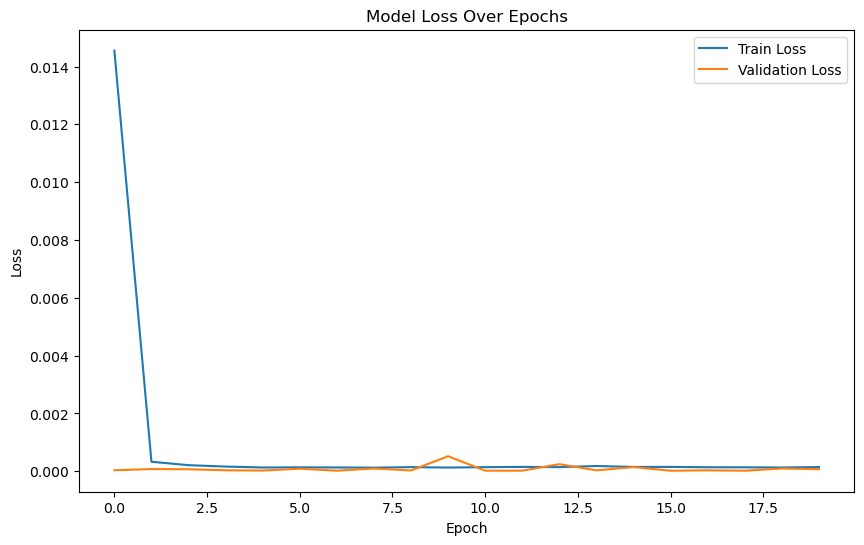

In [80]:
model = Sequential()

model.add(SimpleRNN(units=50, input_shape=(window, 4)))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

history = model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1, validation_split=0.1)

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [81]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, train_predict))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predict))

train_mae = mean_absolute_error(y_train, train_predict)
test_mae = mean_absolute_error(y_test, test_predict)

print(f'\nTrain RMSE: {train_rmse:.2f}')
print(f'Test RMSE: {test_rmse:.2f}')
print(f'Train MAE: {train_mae:.2f}')
print(f'Test MAE: {test_mae:.2f}')

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

Train RMSE: 0.01
Test RMSE: 0.01
Train MAE: 0.01
Test MAE: 0.01
